In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

from sklearn import linear_model, neighbors, ensemble, naive_bayes, svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report
from sklearn import preprocessing
from sklearn.decomposition import PCA

from IPython.display import Image

import warnings

warnings.filterwarnings(
    module='scipy',
    action='ignore',
    message='Using a')
def model(X_train,X_test, y_train, y_test):
    knn = neighbors.KNeighborsClassifier(n_neighbors=10, weights='distance')
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    print('Results of KNN:\n')
    print('\nClassification Report:KNN\n')
    print(classification_report(y_test,y_pred))
    print('Confusion Matrix:')
    sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d',cbar=False)
    plt.show()
    print('ROC_AUC _SCORE:')
    print(roc_auc_score(y_test,y_pred))
    rfc = ensemble.RandomForestClassifier(n_estimators=250, class_weight='balanced',criterion='entropy')
    rfc.fit(X_train,y_train)
    y_pred = rfc.predict(X_test)
    print('\n\nResults of Random Forest:\n')
    print('\nClassification Report:RFC\n')
    print(classification_report(y_test,y_pred))
    print('Confusion Matrix:')
    sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d',cbar=False)
    plt.show()
    print('ROC_AUC _SCORE:')
    print(roc_auc_score(y_test,y_pred))
    lrc = linear_model.LogisticRegression(C=10, penalty='l1')
    lrc.fit(X_train,y_train)
    y_pred = lrc.predict(X_test)
    print('\n\nResults of Logistic Regression (lasso):\n')
    print('\nClassification Report:LR1\n')
    print(classification_report(y_test,y_pred))
    print('Confusion Matrix:')
    sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d',cbar=False)
    plt.show()
    print('ROC_AUC _SCORE:')
    print(roc_auc_score(y_test,y_pred))
    lrc = linear_model.LogisticRegression(C=10, penalty='l2')
    lrc.fit(X_train,y_train)
    y_pred = lrc.predict(X_test)
    print('\n\nResults of Logistic Regression (Ridge):\n')
    print('\nClassification Report:LR2\n')
    print(classification_report(y_test,y_pred))
    print('Confusion Matrix:')
    sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d',cbar=False)
    plt.show()
    print('ROC_AUC _SCORE:')
    print(roc_auc_score(y_test,y_pred))
    gbc = ensemble.GradientBoostingClassifier(n_estimators=500,max_depth=4,loss='exponential')
    gbc.fit(X_train,y_train)
    y_pred = gbc.predict(X_test)
    print('\n\nResults of Gradient Boosting:\n')
    print('\nClassification Report:GBC\n')
    print(classification_report(y_test,y_pred))
    print('Confusion Matrix:')
    sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d',cbar=False)
    plt.show()
    print('ROC_AUC _SCORE:')
    print(roc_auc_score(y_test,y_pred))

In [125]:
#Import the data
attr = pd.read_csv('ibmhrdata.csv')

/root/.pyenv/versions/jupyter3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (5,8,13,17,19,24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [126]:
attr.describe()

,Age,DailyRate,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,MonthlyRate,NumCompaniesWorked,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,23529.000000,23520.000000,23520.000000,23523.000000,23523.000000,23525.000000,23521.000000,23523.000000,23522.000000,23524.000000,23522.000000,23523.000000,23524.000000,23521.000000,23522.000000,23519.00000,23517.000000,23521.000000,23525.000000
mean,36.914489,802.138988,2.911097,13.637844,2.732177,2.063762,14326.710089,3.885006,3.155897,2.712124,79.993495,0.798283,11.262243,2.798946,2.761415,7.00574,4.225837,2.180349,4.122295
std,9.130328,403.215384,1.023910,1184.120784,0.837303,1.105941,7108.509766,155.015694,0.371222,1.080025,0.705406,1.120870,7.785478,1.307426,0.705980,6.13227,3.625954,3.214543,3.573357
min,18.000000,102.000000,1.000000,1.000000,1.000000,1.000000,2094.000000,0.000000,3.000000,1.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,1.000000,8059.000000,1.000000,3.000000,2.000000,80.000000,0.000000,6.000000,2.000000,2.000000,3.00000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,3.000000,3.000000,3.000000,2.000000,14242.000000,2.000000,3.000000,3.000000,80.000000,1.000000,10.000000,3.000000,3.000000,5.00000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,4.000000,4.000000,3.000000,3.000000,20467.000000,4.000000,3.000000,4.000000,80.000000,1.000000,15.000000,3.000000,3.000000,9.00000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,6.000000,129588.000000,54.000000,5.000000,26999.000000,23258.000000,13.000000,4.000000,80.000000,80.000000,40.000000,30.000000,4.000000,40.00000,22.000000,17.000000,17.000000


In [127]:
attr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Employee Source
0,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,1,...,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
1,37.0,Voluntary Resignation,Travel_Rarely,807.0,Human Resources,6,4.0,Human Resources,1,1,...,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
2,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,1,...,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
3,37.0,Voluntary Resignation,Travel_Rarely,807.0,Human Resources,6,4.0,Marketing,1,4,...,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
4,37.0,Voluntary Resignation,Travel_Rarely,807.0,Human Resources,6,4.0,Human Resources,1,5,...,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral


In [128]:
#Clean the data
attr.dtypes

Age                         float64
Attrition                    object
BusinessTravel               object
DailyRate                   float64
Department                   object
DistanceFromHome             object
Education                   float64
EducationField               object
EmployeeCount                object
EmployeeNumber               object
Application ID               object
EnvironmentSatisfaction     float64
Gender                       object
HourlyRate                   object
JobInvolvement              float64
JobLevel                    float64
JobRole                      object
JobSatisfaction              object
MaritalStatus                object
MonthlyIncome                object
MonthlyRate                 float64
NumCompaniesWorked          float64
Over18                       object
OverTime                     object
PercentSalaryHike            object
PerformanceRating           float64
RelationshipSatisfaction    float64
StandardHours               

In [129]:
attrnull = attr.isnull().sum()
attrnull[attrnull>0]

Age                          3
Attrition                   13
BusinessTravel               8
DailyRate                   12
Department                  11
DistanceFromHome             9
Education                   12
EducationField               9
EmployeeCount                5
EmployeeNumber               1
Application ID               3
EnvironmentSatisfaction      9
Gender                      10
HourlyRate                   9
JobInvolvement               9
JobLevel                     7
JobRole                      9
JobSatisfaction              9
MaritalStatus               11
MonthlyIncome               14
MonthlyRate                 11
NumCompaniesWorked           9
Over18                      10
OverTime                    12
PercentSalaryHike           14
PerformanceRating           10
RelationshipSatisfaction     8
StandardHours               10
StockOptionLevel             9
TotalWorkingYears            8
TrainingTimesLastYear       11
WorkLifeBalance             10
YearsAtC

In [130]:
attr.dropna(inplace=True)
for col in attr.select_dtypes(['object','int']):
    print(col,len(attr[col].value_counts()))

Attrition 3
BusinessTravel 3
Department 3
DistanceFromHome 58
EducationField 7
EmployeeCount 2
EmployeeNumber 23236
Application ID 23285
Gender 2
HourlyRate 141
JobRole 9
JobSatisfaction 8
MaritalStatus 3
MonthlyIncome 1468
Over18 1
OverTime 2
PercentSalaryHike 30
Employee Source 10


In [131]:
#Some of these provide little to no information, others seems like they can be converted to numeric
attr.drop(['EmployeeNumber','Application ID','Over18','DailyRate','HourlyRate','MonthlyRate',
          'StandardHours'],1,inplace=True)
attr.DistanceFromHome = pd.to_numeric(attr.DistanceFromHome)
attr.MonthlyIncome = pd.to_numeric(attr.MonthlyIncome)
attr.PercentSalaryHike = pd.to_numeric(attr.PercentSalaryHike)/100
attr.Attrition = pd.to_numeric(np.where(attr.Attrition == 'Voluntary Resignation',1,0))

In [132]:
attr.dtypes

Age                         float64
Attrition                     int64
BusinessTravel               object
Department                   object
DistanceFromHome            float64
Education                   float64
EducationField               object
EmployeeCount                object
EnvironmentSatisfaction     float64
Gender                       object
JobInvolvement              float64
JobLevel                    float64
JobRole                      object
JobSatisfaction              object
MaritalStatus                object
MonthlyIncome               float64
NumCompaniesWorked          float64
OverTime                     object
PercentSalaryHike           float64
PerformanceRating           float64
RelationshipSatisfaction    float64
StockOptionLevel            float64
TotalWorkingYears           float64
TrainingTimesLastYear       float64
WorkLifeBalance             float64
YearsAtCompany              float64
YearsInCurrentRole          float64
YearsSinceLastPromotion     

In [133]:
#turn categorical in numbers, but store labels for later
cat_lists = {}
for col in attr.select_dtypes(['object']):
    cat_lists[col] = attr[col].unique()
    attr[col] = attr[col].astype('category')
    attr[col] = attr[col].cat.codes
    
    

In [134]:
#check variance of categorical variables
for col in attr.select_dtypes(['int8']):
    print(attr[col].value_counts()/len(attr[col]))

2    0.709773
1    0.188463
0    0.101764
Name: BusinessTravel, dtype: float64
1    0.652174
2    0.304348
0    0.043478
Name: Department, dtype: float64
1    0.412078
3    0.315593
2    0.108417
5    0.088888
4    0.055968
0    0.019014
6    0.000043
Name: EducationField, dtype: float64
1    0.696682
0    0.303318
Name: EmployeeCount, dtype: float64
1    0.599897
0    0.400103
Name: Gender, dtype: float64
7    0.218035
6    0.197734
2    0.177304
4    0.102022
0    0.089489
3    0.068372
8    0.056097
5    0.054981
1    0.035967
Name: JobRole, dtype: float64
7    0.226233
6    0.209194
4    0.134598
5    0.126658
2    0.093395
3    0.084467
1    0.062964
0    0.062492
Name: JobSatisfaction, dtype: float64
1    0.457273
2    0.320357
0    0.222370
Name: MaritalStatus, dtype: float64
0    0.716297
1    0.283703
Name: OverTime, dtype: float64
1    0.231040
8    0.157990
3    0.108116
4    0.103309
6    0.099403
5    0.099318
2    0.092579
0    0.090347
7    0.017855
9    0.000043
Name: E

/root/.pyenv/versions/3.6.0/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/root/.pyenv/versions/3.6.0/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


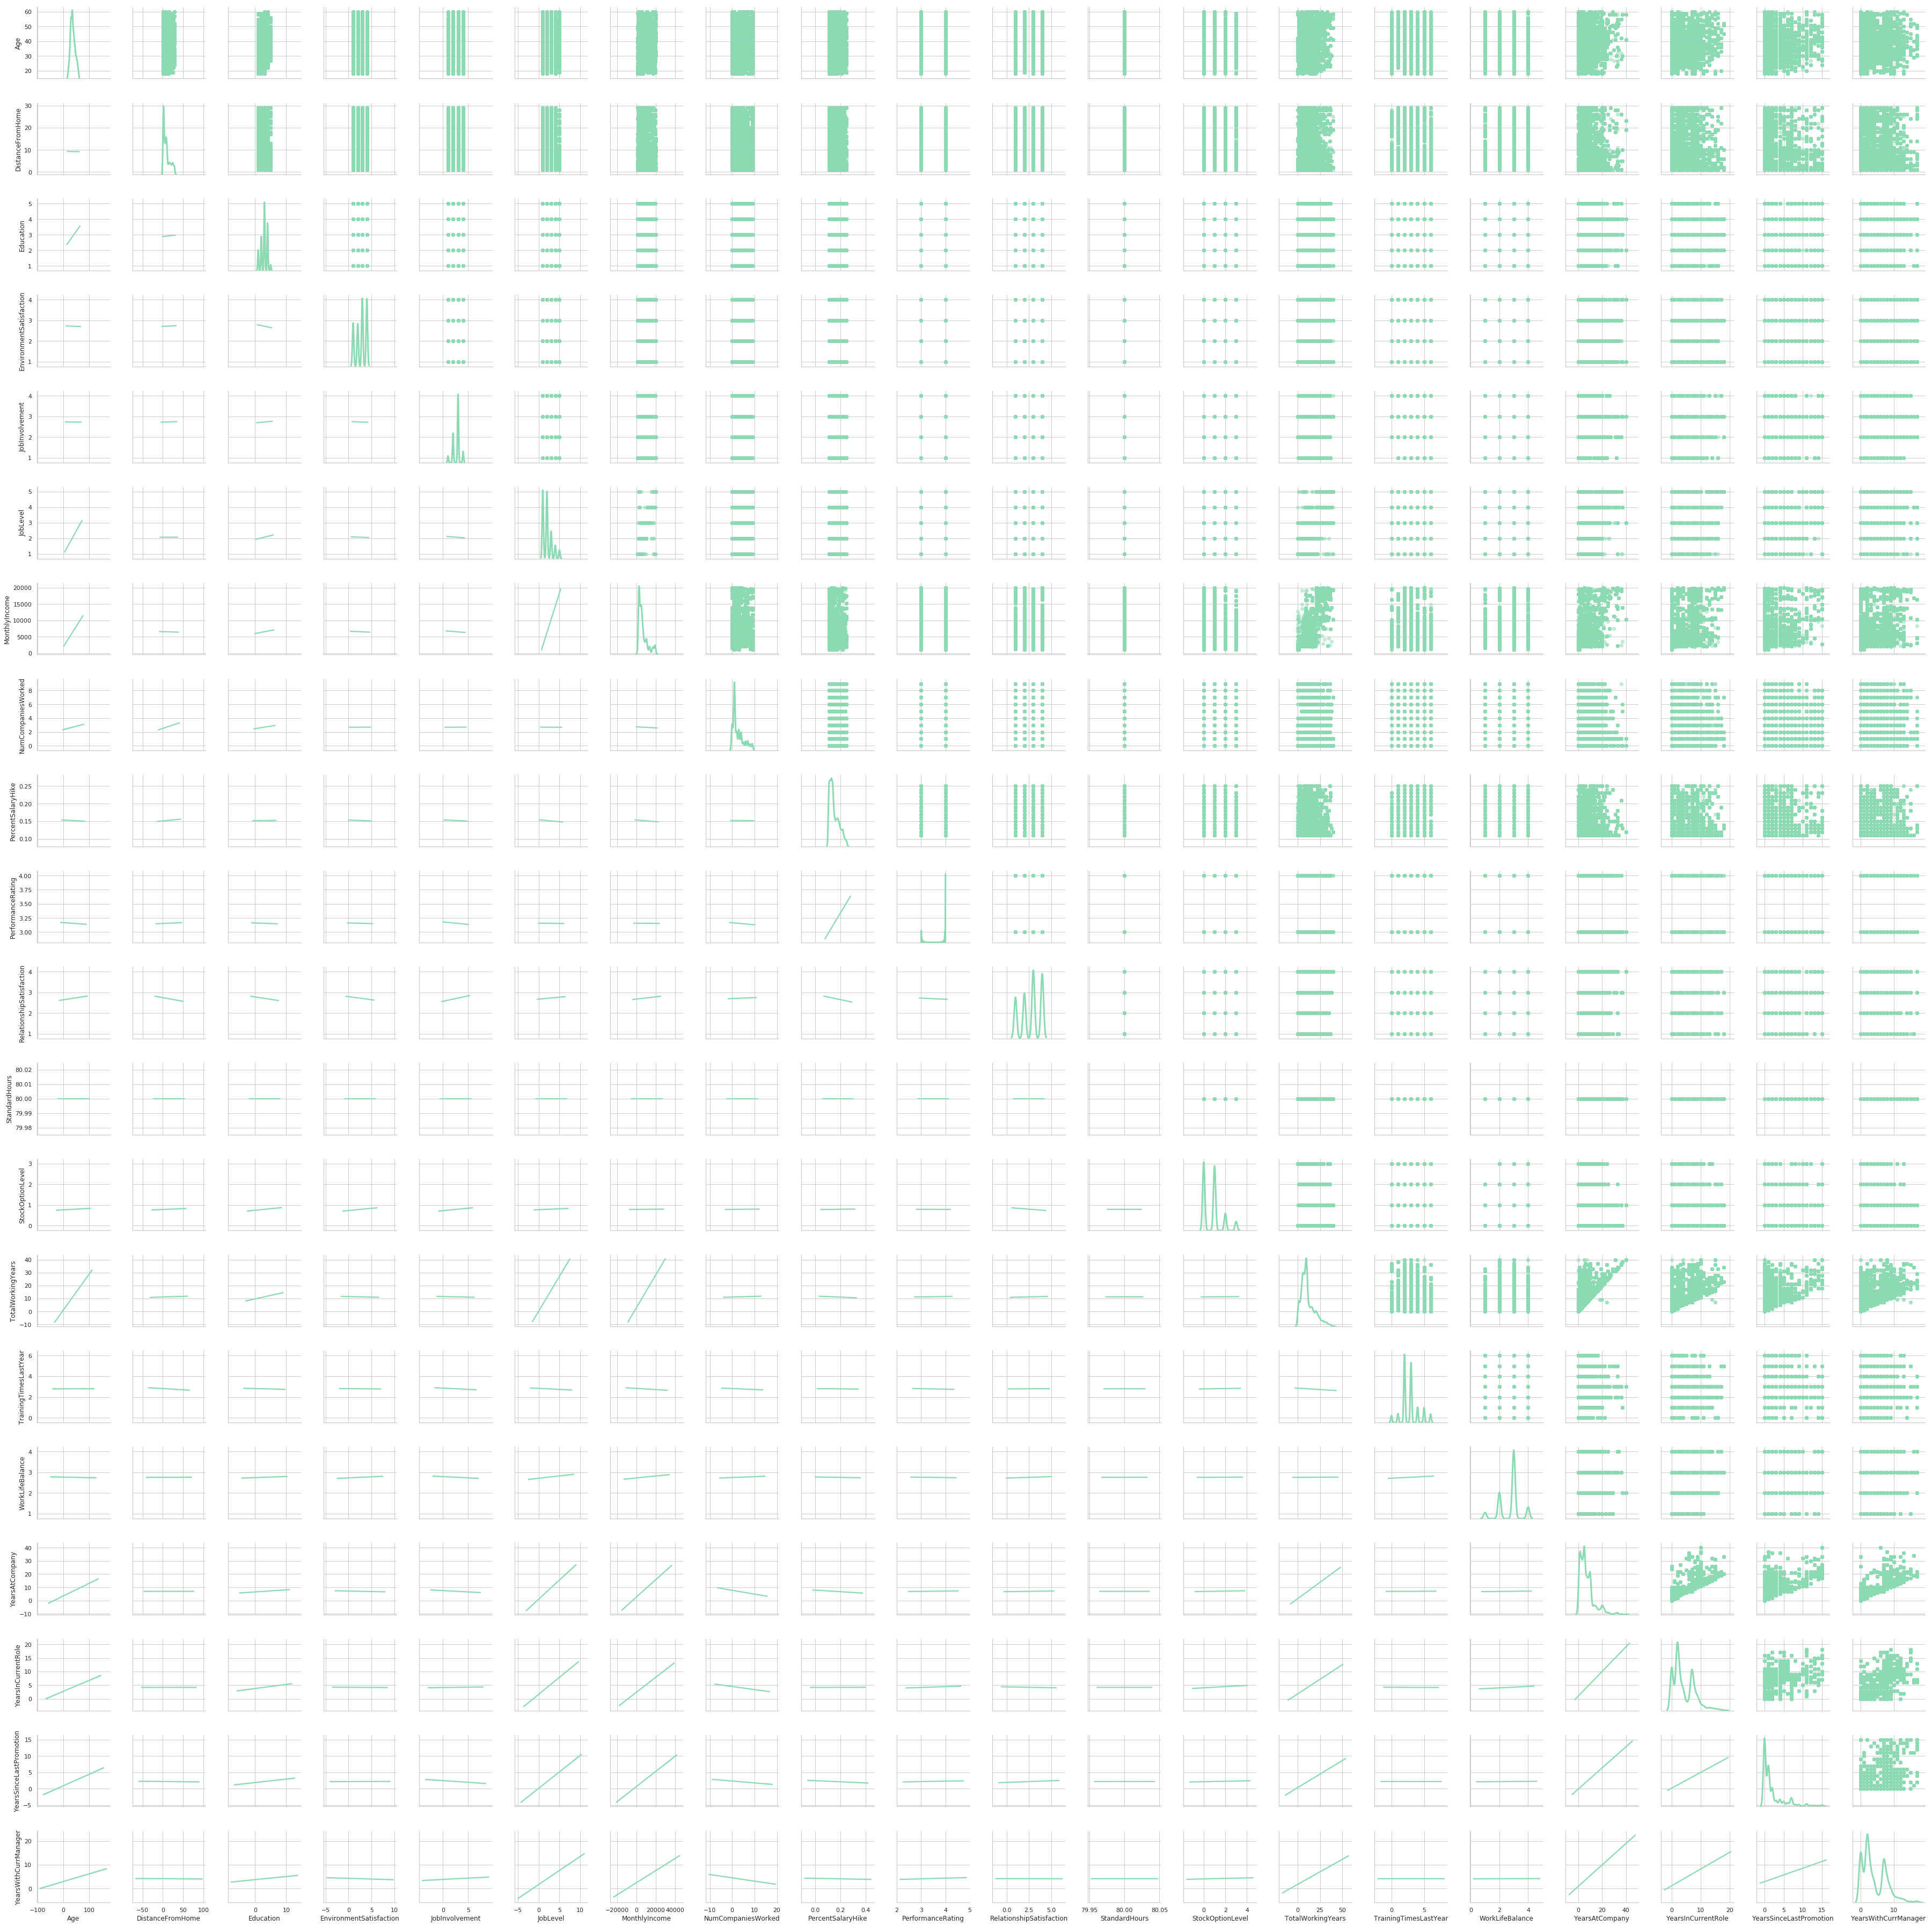

In [120]:
pair_df = attr.select_dtypes(['float64'])

#A quick visuaization,
sns.set(style='whitegrid',palette='mako_r')
g = sns.PairGrid(pair_df, diag_sharey=False)

g.map_upper(plt.scatter, alpha=.5)

g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))

g.map_diag(sns.kdeplot, lw=3)

plt.savefig('attr_pair.png')

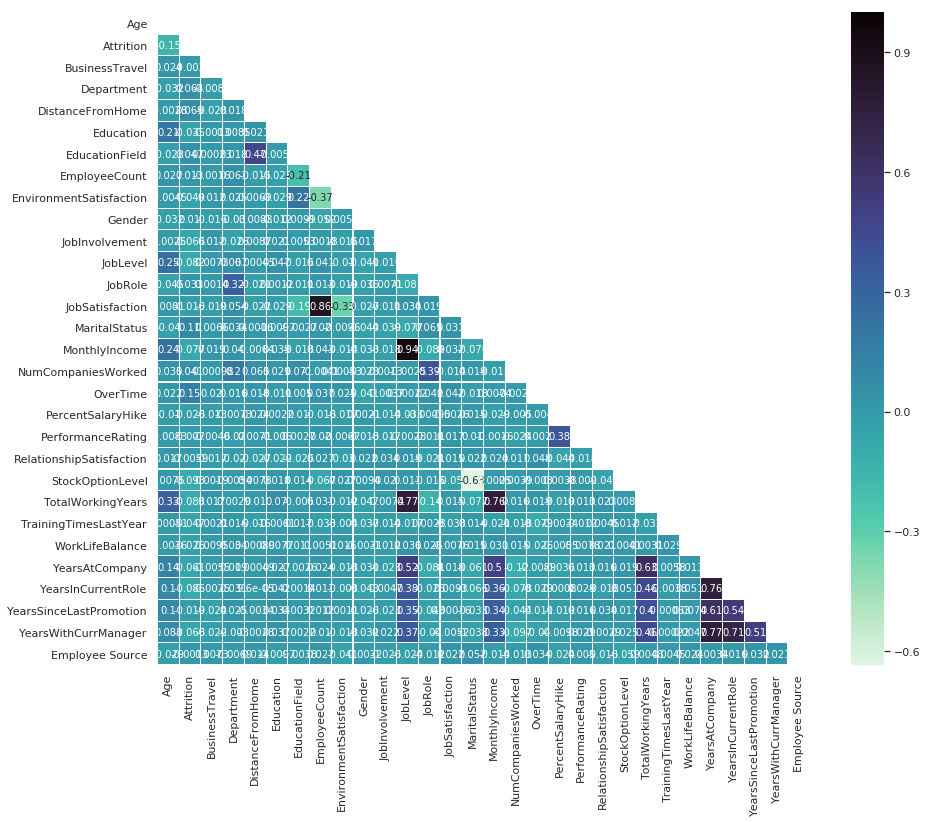

In [136]:
#look for correlation in the variables
#create heat map to show correlation between variables.
corrmat = attr.corr()
mask = np.zeros_like(corrmat)
mask[np.triu_indices_from(mask)] = True
    
with sns.axes_style('white'):    
    ax = plt.subplots(figsize=(15,12))

    sns.heatmap(corrmat,
            vmax=1, 
            cmap="mako_r",
            annot=True,
            linewidth=.05,
            square=True,
            mask=mask)


plt.show()

In [140]:
X = attr.drop(['Attrition'],1)
y = attr.Attrition

X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=.5,random_state=93)

In [144]:
rfc = ensemble.RandomForestRegressor(n_estimators=100)

In [145]:
rfc.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [161]:
y_pred = rfc.predict(X_test)


In [166]:
plot = pd.DataFrame()
plot['y_pred'] = y_pred
plot['hue'] = y_test

In [167]:
plot['log_y_pred'] = np.where(plot.y_pred != 0,np.log(plot.y_pred),0)

/root/.pyenv/versions/jupyter3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


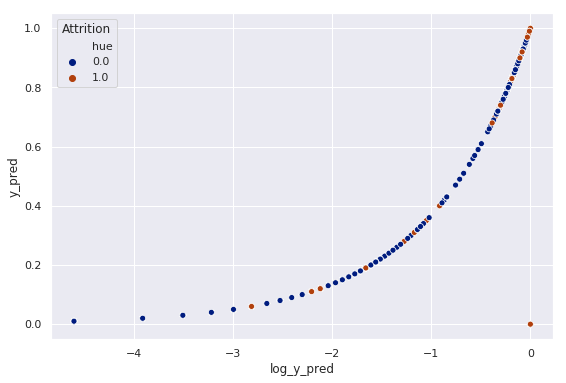

In [176]:
sns.set(palette='dark',style='darkgrid')
fig = plt.figure(figsize=(9,6))
ax = sns.scatterplot(y='y_pred',x='log_y_pred',hue='hue',data=plot)
ax.legend(title='Attrition')

Results of KNN:


Classification Report:KNN

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      9799
           1       0.97      0.93      0.95      1851

   micro avg       0.98      0.98      0.98     11650
   macro avg       0.98      0.96      0.97     11650
weighted avg       0.98      0.98      0.98     11650

Confusion Matrix:


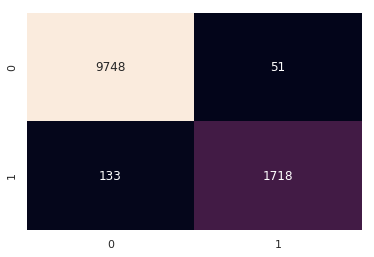

ROC_AUC _SCORE:
0.9614711674401554


Results of Random Forest:


Classification Report:RFC

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      9799
           1       1.00      0.96      0.98      1851

   micro avg       0.99      0.99      0.99     11650
   macro avg       1.00      0.98      0.99     11650
weighted avg       0.99      0.99      0.99     11650

Confusion Matrix:


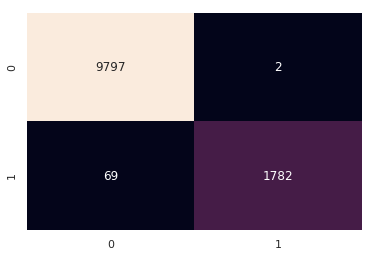

ROC_AUC _SCORE:
0.9812593750263605


/root/.pyenv/versions/3.6.0/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)




Results of Logistic Regression (lasso):


Classification Report:LR1

              precision    recall  f1-score   support

           0       0.85      0.99      0.91      9799
           1       0.62      0.06      0.10      1851

   micro avg       0.84      0.84      0.84     11650
   macro avg       0.73      0.52      0.51     11650
weighted avg       0.81      0.84      0.79     11650

Confusion Matrix:


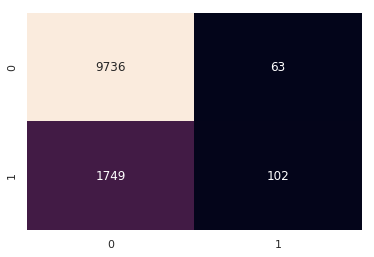

ROC_AUC _SCORE:
0.5243380604940504


/root/.pyenv/versions/3.6.0/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)




Results of Logistic Regression (Ridge):


Classification Report:LR2

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      9799
           1       0.65      0.03      0.05      1851

   micro avg       0.84      0.84      0.84     11650
   macro avg       0.75      0.51      0.48     11650
weighted avg       0.81      0.84      0.78     11650

Confusion Matrix:


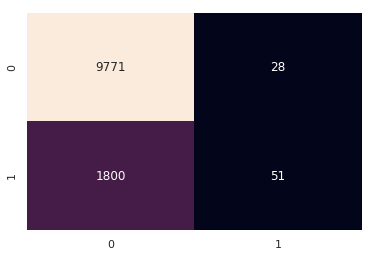

ROC_AUC _SCORE:
0.5123476198990305


Results of Gradient Boosting:


Classification Report:GBC

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      9799
           1       0.98      0.87      0.92      1851

   micro avg       0.98      0.98      0.98     11650
   macro avg       0.98      0.93      0.95     11650
weighted avg       0.98      0.98      0.98     11650

Confusion Matrix:


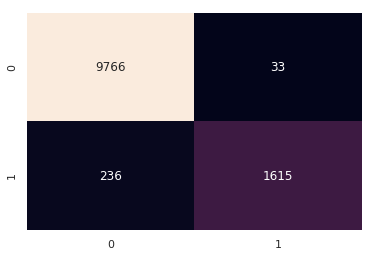

ROC_AUC _SCORE:
0.9345668300203072


In [177]:
model(X_train,X_test,y_train,y_test)

In [178]:
feature_sigs = pd.DataFrame(
    sorted(zip(map(lambda x: round(x, 4), rfc.feature_importances_), 
               X.columns), reverse=True))
feature_sigs

,0,1
0,0.1276,Age
1,0.0967,DistanceFromHome
2,0.0927,MonthlyIncome
3,0.0507,TotalWorkingYears
4,0.0486,PercentSalaryHike
5,0.0394,Education
6,0.0391,JobSatisfaction
7,0.0350,JobRole
8,0.0338,Employee Source
9,0.0329,YearsAtCompany


In [180]:
len(attr.columns)

30

In [182]:
feature_sigs = pd.DataFrame(
    sorted(zip(map(lambda x: round(x, 4), gbc.feature_importances_), 
               X.columns), reverse=True))
feature_sigs

NameError: name 'gbc' is not defined